In [3]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import array
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from itertools import cycle, islice
from matplotlib import cm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
import seaborn as sns
from collections import Counter
import plotly.express as px
from math import pi
import pygal

In [4]:
cleansed="cleansed_df.csv"
audiofeature_path = "audiofeatures_df.csv"
master="master.csv"
audiofeature_dataframe = pd.read_csv(audiofeature_path)
cleansed_df=pd.read_csv(cleansed)
audiofeature_dataframe.head()


FileNotFoundError: [Errno 2] File audiofeatures_df.csv does not exist: 'audiofeatures_df.csv'

In [3]:
#Track duration - convert milisecond to second
duration_ms_list = audiofeature_dataframe['Duration_ms'].tolist()
duration_ms_list
Int = 1000
s_list = [x / Int for x in duration_ms_list]
duration_s_list = [round(s) for s in s_list]
#duration_s_list

NameError: name 'audiofeature_dataframe' is not defined

In [4]:
#Make a bargraph of track duration
genre_duration = audiofeature_dataframe[["Genre","Duration_ms"]]
genre_duration['Duration_s']= duration_s_list
genre_duration_s = genre_duration[["Genre","Duration_s"]]
color = cm.viridis(np.linspace(0.1, 0.9, 130))
ax = genre_duration_s.plot.bar(x='Genre', y='Duration_s', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Average Duration(s)")
plt.show
plt.savefig("outputs/Average_duration_bar_graph.png")



NameError: name 'audiofeature_dataframe' is not defined

In [5]:
genre_population=audiofeature_dataframe[["Genre","Valence"]]
color = cm.inferno_r(np.linspace(0.01, 0.9, 130))
#color
ax = genre_population.plot.bar(x='Genre', y='Valence', rot=0,figsize=(21,7),color = color )
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel("Valence")
plt.show
plt.savefig("outputs/Average_Valence_bar_graph.png")

NameError: name 'audiofeature_dataframe' is not defined

In [6]:
#Define function for simple linear regression
def reg(d,i,f):
    dataframe= f[[d,i]]
    dataframe.plot.scatter( x=[d] , y=[i])
    
    x= dataframe[[d]]
    y= dataframe[[i]]
    
    model=LinearRegression()
    model.fit(x,y)
    beta=model.coef_
    alpha=model.intercept_
    yline=model.predict(x)
    plt.scatter(x,y)
    plt.plot(x, yline,"r")
    Rsquare=r2_score(y, yline)


    plt.title(f"{d} by {i}")
    plt.xlabel(f"{d}")
    plt.ylabel(f"{i}")
    
#----Display coeficient, intercept, and R^2
    print(f"\u03B2 ={beta}")
    print(f"\u03B1 ={alpha}")
    print(f"R^2={Rsquare}")
    plt.savefig(f"outputs/regress{d}_{i}.png")
    plt.show()

In [7]:
#Define function for scatter
def scatter(d,i,f):
    dataframe= f[[d,i]]
    dataframe.plot.scatter( x=[d] , y=[i])
    
    x= dataframe[[d]]
    y= dataframe[[i]]
    plt.scatter(x,y)


    plt.title(f"{d} by {i}")
    plt.xlabel(f"{d}")
    plt.ylabel(f"{i}")
    plt.savefig(f"outputs/scatter{d}_{i}.png")

    plt.show()

In [8]:
sns.pairplot(cleansed_df)
plt.savefig("all_scatters.png")

NameError: name 'cleansed_df' is not defined

In [9]:
print (cleansed_df.corr())

NameError: name 'cleansed_df' is not defined

In [10]:
scatter("Danceability","Energy", cleansed_df)

NameError: name 'cleansed_df' is not defined

In [11]:
scatter("Energy","Danceability", cleansed_df)

NameError: name 'cleansed_df' is not defined

In [12]:
reg("Energy","Danceability", cleansed_df)

NameError: name 'cleansed_df' is not defined

In [13]:
sns.lmplot("Energy","Danceability", cleansed_df, line_kws={'color': 'red'}, order=2)
title="energy_dance_parabola"
plt.savefig(f"outputs/sns{title}.png")

NameError: name 'cleansed_df' is not defined

In [14]:
#Generate a list of substantively interesting genres.
#Method: researcher's careful judgment (That's academic language for 
#I made it up. Suggestions for a better list are welcomed.)
substantive_list=["classical","country","electronic","jazz","hip-hop","rock","pop"]

In [15]:
#Compare the relationship for each genre.
#It looks like pop music and rock music have the most "normal" looking relationship.
#We can also see that different genres have very different average energy distributions.

subs_df=cleansed_df.loc[cleansed_df["Genre"].isin(["classical","country","electronic","jazz","hip-hop","rock","pop"])]
sns.lmplot(x="Energy", y="Danceability", data=subs_df ,order=2, hue="Genre")
title="genrelist_parabolas"
plt.savefig(f"outputs/sns{title}.png")

NameError: name 'cleansed_df' is not defined

In [16]:
Image(filename="final_energy.PNG")

NameError: name 'Image' is not defined

In [17]:
# List of languages
language_genre_list = ['brazil', 'british', 'cantopop', 'mandopop', 'french', 'german', 'indian', 'iranian', 'malay', 'philippines-opm', 'spanish', 'swedish', 'turkish']

# DataFrame with average values, by genre
language_genre_agg = audiofeature_dataframe.aggregate(np.mean)

# Filtering on languages, as per above list
language_genre_df = language_genre_agg.filter(language_genre_list, axis=0)
language_genre_df

NameError: name 'audiofeature_dataframe' is not defined

In [18]:
# Turning Valence and Energy (measurement scale = 0.0 - 1.0) into percentages, by multiplying by 100
language_genre_df["Energy"] = language_genre_df["Energy"] * 100
language_genre_df["Valence"] = language_genre_df["Valence"] * 100
language_genre_df["Danceability"] = language_genre_df["Danceability"] * 100
language_genre_df["Speechiness"] = language_genre_df["Speechiness"] * 100
language_genre_df

# # Empty list, to store Popularity, Energy and Valence values for each Genre in language_genre_df
genre_values = []

# For loop, that iterates through Popularity, Energy and Valence rows and appends values to the genre_values list
for index, rows in language_genre_df.iterrows():
    my_list = [rows.Popularity, rows.Energy, rows.Valence, rows.Danceability, rows.Speechiness]
    genre_values.append(my_list)   

# # rounding values in nested lists to 2-decimal places.
genre_values = np.round(genre_values, 2)
genre_values

NameError: name 'language_genre_df' is not defined

In [19]:
# Audio features list
audio_features = ["Popularity", "Energy", "Valence", "Danceability", "Speechiness"]

# List of all genre values for Popularity, Energy, Valence

# OTHER bucket genres
brazil_values = [28.42, 60.34, 61.69, 59.97, 5.61]
turkish = [26.61, 70.23, 59.10, 62.56, 6.58]
british_values = [39.99, 73.01, 56.9, 54.32, 5.26]

In [20]:
# Fig w-1 - European Audio Features

# EUROPEAN genres, containing values
french = [14.26, 53.23, 56.05, 56.66, 6.88]
# Closing each radar shape by contatinating the first and last element of each shape.
french = np.concatenate((french,[french[0]]))

german = [26.65, 71.64, 58.68, 64.01, 9.46] 
# Closing each radar shape by contatinating the first and last element of each shape.
german = np.concatenate((german,[german[0]]))

spanish = [42.25, 72.19, 66.47, 65.83, 5.30]
# Closing each radar shape by contatinating the first and last element of each shape.
spanish = np.concatenate((spanish,[spanish[0]]))

swedish = [31.53, 65.55, 57.13, 55.68, 8.01]
# Closing each radar shape by contatinating the first and last element of each shape.
swedish = np.concatenate((swedish,[swedish[0]]))

In [21]:
# Calculating evenly-spaced angel coordinates. Using radians for the polar plot with 2 multipled by np pie
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(french))
print(2*np.pi, 'radians=', 2*np.degrees(2*np.pi), 'degrees')

6.283185307179586 radians= 720.0 degrees


In [22]:
print('radians', label_placement)
print('degrees', np.degrees(label_placement))

radians [0.         1.25663706 2.51327412 3.76991118 5.02654825 6.28318531]
degrees [  0.  72. 144. 216. 288. 360.]


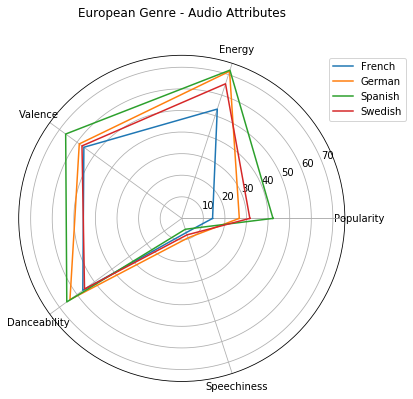

In [23]:
plt.figure(figsize = (6,6))
plt.subplot(polar=True)
plt.plot(label_placement, french)
plt.plot(label_placement, german)
plt.plot(label_placement, spanish)
plt.plot(label_placement, swedish)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels =audio_features)
plt.title('European Genre - Audio Attributes', y=1.1)
plt.legend(labels=['French', 'German', 'Spanish', 'Swedish'], loc=(0.95, 0.8))
plt.savefig(f"outputs/European_Genre_Audio_Attributes.png")

In [24]:
# fig w-2 - # Fig w-1 - Asian Audio Features

# Asian Genres lists, containing values
cantopop = [14.23, 49.55, 43.11, 57.97, 4.06]
# Closing each radar shape by contatinating the first and last element of each shape.
cantopop = np.concatenate((cantopop,[cantopop[0]]))

mandopop = [15.17, 48.86, 34.91, 54.73, 3.75]
# Closing each radar shape by contatinating the first and last element of each shape.
mandopop = np.concatenate((mandopop,[mandopop[0]]))

indian = [26.8 , 66.67, 59.07, 62.05, 6.85]
# Closing each radar shape by contatinating the first and last element of each shape.
indian = np.concatenate((indian,[indian[0]]))

iranian = [21.24, 58.50, 60.02, 56.27, 7.12]
# Closing each radar shape by contatinating the first and last element of each shape.
iranian = np.concatenate((iranian,[iranian[0]]))

malay = [16.61, 55.03, 43.90, 50.84, 3.57]
# Closing each radar shape by contatinating the first and last element of each shape.
malay = np.concatenate((malay,[malay[0]]))

phillippines_opm = [9.95, 45.64, 31.98, 48.08, 3.89]
# Closing each radar shape by contatinating the first and last element of each shape.
phillippines_opm = np.concatenate((phillippines_opm,[phillippines_opm[0]]))

In [25]:
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(cantopop))
print(2*np.pi, 'radians=', 2*np.degrees(2*np.pi), 'degrees')

6.283185307179586 radians= 720.0 degrees


In [26]:
print('radians', label_placement)
print('degrees', np.degrees(label_placement))

radians [0.         1.25663706 2.51327412 3.76991118 5.02654825 6.28318531]
degrees [  0.  72. 144. 216. 288. 360.]


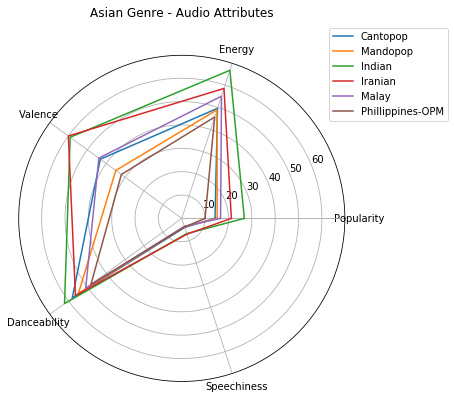

In [27]:
plt.figure(figsize = (6,6))
plt.subplot(polar=True)
plt.plot(label_placement, cantopop)
plt.plot(label_placement, mandopop)
plt.plot(label_placement, indian)
plt.plot(label_placement, iranian)
plt.plot(label_placement, malay)
plt.plot(label_placement, phillippines_opm)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels =audio_features)
plt.title('Asian Genre - Audio Attributes', y=1.1)
plt.legend(labels=['Cantopop', 'Mandopop', 'Indian', 'Iranian', 'Malay', 'Phillippines-OPM'], loc=(0.95, 0.8))
plt.savefig(f"outputs/Asian_Genre_Audio_Attributes.png")